# Introduction to NumPy for Chemistry - Part A

## Objective
This notebook introduces NumPy, a fundamental library for scientific computing in Python, with basic concepts and applications relevant to chemistry.

## 1. Introduction to NumPy

NumPy (Numerical Python) is a powerful library that provides support for large, multi-dimensional arrays and matrices, along with a collection of high-level mathematical functions to operate on these arrays. It's the foundation of scientific computing in Python and is used extensively in chemistry research for:

- Processing spectroscopic data
- Simulating molecular systems
- Analyzing experimental results
- Statistical analysis of chemical data
- Numerical solving of chemical kinetics and thermodynamics equations

Let's start by importing NumPy:

In [1]:
import numpy as np

# Verify NumPy version
print(f"NumPy version: {np.__version__}")

NumPy version: 1.21.6


## 2. NumPy Arrays vs. Python Lists

The core functionality of NumPy is the `ndarray` (n-dimensional array). Let's compare NumPy arrays to Python lists to understand why NumPy is so essential for scientific computing.

In [2]:
# Creating a Python list and a NumPy array
# Let's use atomic masses of the first five elements as our example
atomic_masses_list = [1.008, 4.0026, 6.94, 9.0122, 10.81]  # H, He, Li, Be, B
atomic_masses_array = np.array(atomic_masses_list)

print("Python list:", atomic_masses_list)
print("NumPy array:", atomic_masses_array)
print("Type of Python list:", type(atomic_masses_list))
print("Type of NumPy array:", type(atomic_masses_array))

Python list: [1.008, 4.0026, 6.94, 9.0122, 10.81]
NumPy array: [ 1.008   4.0026  6.94    9.0122 10.81  ]
Type of Python list: <class 'list'>
Type of NumPy array: <class 'numpy.ndarray'>


In [3]:
# Key difference 1: Mathematical operations
# Let's calculate the number of atoms in 1 gram of each element

# With Python list - requires a loop
avogadro = 6.022e23  # atoms/mol
atoms_per_gram_list = []
for mass in atomic_masses_list:
    atoms_per_gram = avogadro / mass
    atoms_per_gram_list.append(atoms_per_gram)

# With NumPy array - vectorized operation
atoms_per_gram_array = avogadro / atomic_masses_array

print("Atoms per gram (Python list):\n", atoms_per_gram_list)
print("\nAtoms per gram (NumPy array):\n", atoms_per_gram_array)

Atoms per gram (Python list):
 [5.974206349206349e+23, 1.5045220606605707e+23, 8.677233429394813e+22, 6.682053216750627e+22, 5.570767807585569e+22]

Atoms per gram (NumPy array):
 [5.97420635e+23 1.50452206e+23 8.67723343e+22 6.68205322e+22
 5.57076781e+22]


In [4]:
# Key difference 2: Speed
import time

# Create larger data sets for speed comparison
large_list = list(range(1000000))
large_array = np.array(large_list)

# Multiply each element by 2
# Python list
start_time = time.time()
result_list = [x * 2 for x in large_list]
list_time = time.time() - start_time

# NumPy array
start_time = time.time()
result_array = large_array * 2
array_time = time.time() - start_time

print(f"Time for Python list operation: {list_time:.6f} seconds")
print(f"Time for NumPy array operation: {array_time:.6f} seconds")
print(f"NumPy is {list_time/array_time:.1f}x faster")

Time for Python list operation: 0.060319 seconds
Time for NumPy array operation: 0.003901 seconds
NumPy is 15.5x faster


As we can see, NumPy offers significant advantages over regular Python lists:

1. **Vectorized operations**: Mathematical operations can be applied to entire arrays without explicit loops
2. **Performance**: NumPy operations are significantly faster, especially for large datasets
3. **Memory efficiency**: NumPy uses fixed datatypes, making storage more efficient than Python's dynamic types
4. **Scientific functionality**: NumPy includes many mathematical functions relevant to scientific computing

These advantages make NumPy essential for chemistry applications involving large datasets or intensive calculations.

## 3. Creating NumPy Arrays

Let's explore different ways to create NumPy arrays for chemistry applications:

In [5]:
# 1. From a Python list
molar_masses = np.array([18.02, 44.01, 32.00, 28.01])  # H2O, CO2, O2, N2
print("From list:", molar_masses)

# 2. Using np.arange (like Python's range)
# Create array for a range of pH values from 0 to 14 with step size 1
ph_values = np.arange(0, 14.1, 1.0)
print("\npH values:", ph_values)

# 3. Using np.linspace (linearly spaced values)
# Create array for a temperature range from 0°C to 100°C with 11 points (10°C steps)
temperatures = np.linspace(0, 100, 11)
print("\nTemperatures (°C):", temperatures)

# 4. Using common arrays
zeroes = np.zeros(5)  # Array of 5 zeros
ones = np.ones(5)    # Array of 5 ones
print("\nZeros array:", zeroes)
print("Ones array:", ones)

From list: [18.02 44.01 32.   28.01]

pH values: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]

Temperatures (°C): [  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]

Zeros array: [0. 0. 0. 0. 0.]
Ones array: [1. 1. 1. 1. 1.]


### 3.1 Chemistry Application: Dilution Series

Let's use NumPy to create a concentration dilution series, something commonly needed in laboratory work:

In [6]:
# Create a 2-fold dilution series starting from 1 M
initial_concentration = 1.0  # mol/L
dilution_factor = 2
num_dilutions = 10

# Method 1: Using a loop (the old way)
dilution_series_loop = [initial_concentration]
for i in range(1, num_dilutions):
    next_conc = dilution_series_loop[i-1] / dilution_factor
    dilution_series_loop.append(next_conc)

# Method 2: Using NumPy (the more elegant way)
dilution_powers = np.arange(0, num_dilutions)
dilution_series_numpy = initial_concentration / (dilution_factor ** dilution_powers)

print("Dilution series (loop):", dilution_series_loop)
print("Dilution series (NumPy):", dilution_series_numpy)

Dilution series (loop): [1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125]
Dilution series (NumPy): [1.         0.5        0.25       0.125      0.0625     0.03125
 0.015625   0.0078125  0.00390625 0.00195312]


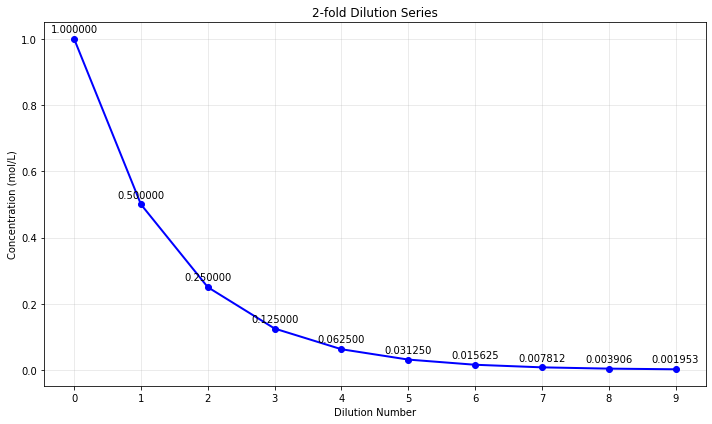

In [7]:
# Let's visualize this dilution series
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(num_dilutions), dilution_series_numpy, 'o-', color='blue', linewidth=2)
plt.xlabel('Dilution Number')
plt.ylabel('Concentration (mol/L)')
plt.title('2-fold Dilution Series')
plt.grid(True, alpha=0.3)
plt.xticks(range(num_dilutions))

# Adding concentration values as text
for i, conc in enumerate(dilution_series_numpy):
    plt.text(i, conc + 0.02, f"{conc:.6f}", ha='center')

plt.tight_layout()
plt.show()

## 4. Array Operations and Broadcasting

NumPy allows efficient operations on arrays without explicit loops, which is called "broadcasting". This is particularly useful for scientific calculations.

In [8]:
# Basic arithmetic operations
# Let's consider volumes (in mL) and concentrations (in mol/L) for different solutions
volumes = np.array([10, 25, 50, 100, 250])
concentrations = np.array([0.1, 0.05, 0.01, 0.005, 0.001])

# Calculate moles = volume (L) × concentration (mol/L)
# First convert mL to L
volumes_L = volumes / 1000
moles = volumes_L * concentrations

print("Volumes (mL):", volumes)
print("Concentrations (mol/L):", concentrations)
print("Moles of solute (mol):", moles)

Volumes (mL): [ 10  25  50 100 250]
Concentrations (mol/L): [0.1   0.05  0.01  0.005 0.001]
Moles of solute (mol): [0.001   0.00125 0.0005  0.0005  0.00025]


In [9]:
# Broadcasting: operations between arrays of different shapes
# Let's convert our volumes to different units

# Conversion factors
conversion_factors = np.array([1, 0.001, 1000, 33.814])  # mL, L, μL, fl.oz.

# Broadcasting volumes across conversion factors
# This will create a 2D array where each row is the volumes in a different unit
volumes_in_different_units = volumes * conversion_factors[:, np.newaxis]

# Create a table showing the results
unit_names = ['mL', 'L', 'μL', 'fl.oz.']
print("Volumes in different units:")
for i, unit in enumerate(unit_names):
    print(f"{unit}: {volumes_in_different_units[i]}")

Volumes in different units:
mL: [ 10.  25.  50. 100. 250.]
L: [0.01  0.025 0.05  0.1   0.25 ]
μL: [ 10000.  25000.  50000. 100000. 250000.]
fl.oz.: [ 338.14  845.35 1690.7  3381.4  8453.5 ]


### 4.1 Chemistry Application: Stoichiometric Calculations

Let's use NumPy to solve stoichiometry problems, which are fundamental in chemistry:

In [10]:
# Reaction: 2H₂ + O₂ → 2H₂O
# Calculate mass of water formed from given masses of reactants

# Molar masses (g/mol)
molar_masses = np.array([2.016, 31.998, 18.015])  # H₂, O₂, H₂O

# Stoichiometric coefficients
coefficients = np.array([2, 1, 2])  # 2H₂ + O₂ → 2H₂O

# Test case: calculate with different masses of reactants
masses_hydrogen = np.array([1.0, 2.0, 5.0, 10.0])  # grams of H₂
masses_oxygen = np.array([16.0, 20.0, 40.0, 80.0])  # grams of O₂

# Calculate moles of each reactant
moles_hydrogen = masses_hydrogen / molar_masses[0]
moles_oxygen = masses_oxygen / molar_masses[1]

# Determine the limiting reactant (in terms of H₂O production)
moles_water_from_hydrogen = moles_hydrogen * (coefficients[2] / coefficients[0])
moles_water_from_oxygen = moles_oxygen * (coefficients[2] / coefficients[1])

# The limiting reactant gives the lower moles of product
moles_water = np.minimum(moles_water_from_hydrogen, moles_water_from_oxygen)

# Calculate mass of water produced
mass_water = moles_water * molar_masses[2]

# Create a table of results
print("Stoichiometric calculations for 2H₂ + O₂ → 2H₂O:")
print("\nMass H₂ (g) | Mass O₂ (g) | Mass H₂O (g) | Limiting Reactant")
print("-" * 65)
for i in range(len(masses_hydrogen)):
    limiting = "H₂" if moles_water_from_hydrogen[i] < moles_water_from_oxygen[i] else "O₂"
    print(f"{masses_hydrogen[i]:10.2f} | {masses_oxygen[i]:10.2f} | {mass_water[i]:11.2f} | {limiting:^17}")

Stoichiometric calculations for 2H₂ + O₂ → 2H₂O:

Mass H₂ (g) | Mass O₂ (g) | Mass H₂O (g) | Limiting Reactant
-----------------------------------------------------------------
      1.00 |      16.00 |        8.94 |        H₂        
      2.00 |      20.00 |       17.87 |        H₂        
      5.00 |      40.00 |       44.68 |        H₂        
     10.00 |      80.00 |       89.36 |        H₂        


Let's visualize this data to better understand the relationship between reactant masses and product formation:

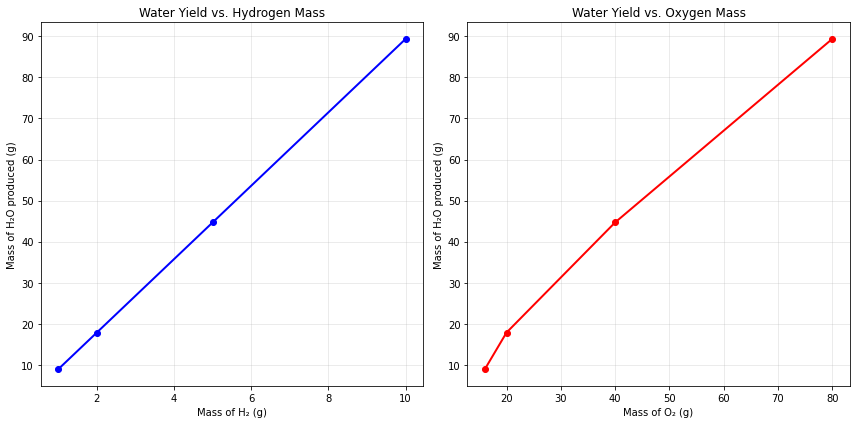

In [11]:
import matplotlib.pyplot as plt

# Plot water yield vs reactant masses
plt.figure(figsize=(12, 6))

# Create two subplots side by side
plt.subplot(1, 2, 1)
plt.plot(masses_hydrogen, mass_water, 'o-', color='blue', linewidth=2)
plt.xlabel('Mass of H₂ (g)')
plt.ylabel('Mass of H₂O produced (g)')
plt.title('Water Yield vs. Hydrogen Mass')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(masses_oxygen, mass_water, 'o-', color='red', linewidth=2)
plt.xlabel('Mass of O₂ (g)')
plt.ylabel('Mass of H₂O produced (g)')
plt.title('Water Yield vs. Oxygen Mass')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. NumPy's Boolean Indexing and Filtering

NumPy allows you to filter arrays using Boolean conditions, which is very useful for analyzing scientific data.

In [12]:
# Let's create a dataset of temperature readings (°C) from an experiment
temperatures = np.array([22.5, 25.1, 23.4, 19.8, 26.3, 22.9, 24.7, 20.5, 25.8, 21.2])

# Find all temperatures above 24°C
high_temps_mask = temperatures > 24.0
high_temps = temperatures[high_temps_mask]

print("All temperatures (°C):", temperatures)
print("Boolean mask for T > 24°C:", high_temps_mask)
print("Temperatures above 24°C:", high_temps)
print(f"Average of high temperatures: {np.mean(high_temps):.2f}°C")

All temperatures (°C): [22.5 25.1 23.4 19.8 26.3 22.9 24.7 20.5 25.8 21.2]
Boolean mask for T > 24°C: [False  True False False  True False  True False  True False]
Temperatures above 24°C: [25.1 26.3 24.7 25.8]
Average of high temperatures: 25.48°C


In [13]:
# Combining multiple conditions
# Find temperatures between 22°C and 24°C
moderate_temps_mask = (temperatures >= 22.0) & (temperatures <= 24.0)
moderate_temps = temperatures[moderate_temps_mask]

print("Temperatures between 22°C and 24°C:", moderate_temps)
print(f"Average of moderate temperatures: {np.mean(moderate_temps):.2f}°C")

# Find temperatures either below 21°C or above 25°C
extreme_temps_mask = (temperatures < 21.0) | (temperatures > 25.0)
extreme_temps = temperatures[extreme_temps_mask]

print("\nTemperatures below 21°C or above 25°C:", extreme_temps)

Temperatures between 22°C and 24°C: [22.5 23.4 22.9]
Average of moderate temperatures: 22.93°C

Temperatures below 21°C or above 25°C: [25.1 19.8 26.3 20.5 25.8]


### 5.1 Chemistry Application: Quality Control

Let's use boolean indexing for a quality control application in a chemistry lab:

In [14]:
# Lab data: pH measurements for a batch of buffer solutions
# Target pH: 7.4 (physiological pH)
# Acceptable range: 7.35 - 7.45
batch_ids = np.arange(1, 21)  # 20 batches
ph_values = np.array([7.42, 7.38, 7.36, 7.33, 7.41, 7.39, 7.37, 7.46, 7.40, 7.35,
                      7.39, 7.43, 7.47, 7.32, 7.44, 7.38, 7.40, 7.41, 7.36, 7.34])

# Create a boolean mask for acceptable pH range
in_spec_mask = (ph_values >= 7.35) & (ph_values <= 7.45)
out_of_spec_mask = ~in_spec_mask  # Negation of in_spec_mask

# Apply masks to find batch IDs that are in/out of specification
in_spec_batches = batch_ids[in_spec_mask]
out_of_spec_batches = batch_ids[out_of_spec_mask]
out_of_spec_pH = ph_values[out_of_spec_mask]

# Print results
print(f"Total batches: {len(batch_ids)}")
print(f"Batches in specification: {len(in_spec_batches)} ({len(in_spec_batches)/len(batch_ids)*100:.1f}%)")
print(f"Batches out of specification: {len(out_of_spec_batches)} ({len(out_of_spec_batches)/len(batch_ids)*100:.1f}%)")
print("\nOut-of-spec batch IDs and their pH values:")
for batch, ph in zip(out_of_spec_batches, out_of_spec_pH):
    print(f"Batch #{batch}: pH {ph} {'(too acidic)' if ph < 7.35 else '(too basic)'}")

Total batches: 20
Batches in specification: 15 (75.0%)
Batches out of specification: 5 (25.0%)

Out-of-spec batch IDs and their pH values:
Batch #4: pH 7.33 (too acidic)
Batch #8: pH 7.46 (too basic)
Batch #13: pH 7.47 (too basic)
Batch #14: pH 7.32 (too acidic)
Batch #20: pH 7.34 (too acidic)


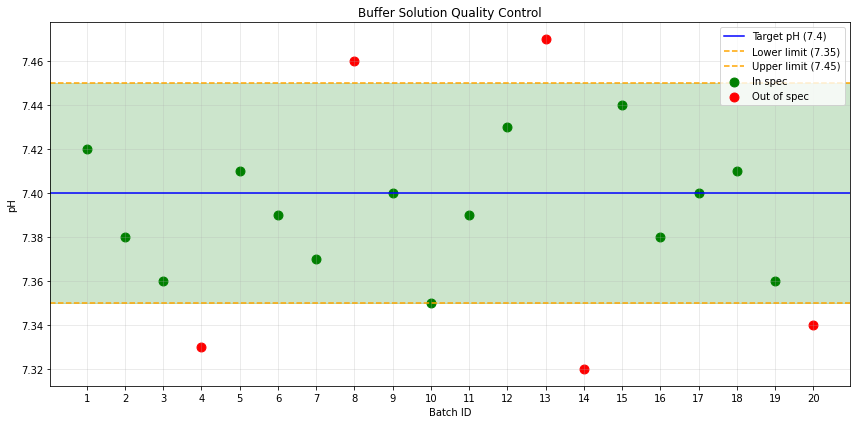

In [15]:
# Visualize the pH data
plt.figure(figsize=(12, 6))

# Plot all pH values
plt.scatter(batch_ids[in_spec_mask], ph_values[in_spec_mask], 
            color='green', label='In spec', s=80)
plt.scatter(batch_ids[out_of_spec_mask], ph_values[out_of_spec_mask], 
            color='red', label='Out of spec', s=80)

# Add target and range lines
plt.axhline(y=7.4, color='blue', linestyle='-', label='Target pH (7.4)')
plt.axhline(y=7.35, color='orange', linestyle='--', label='Lower limit (7.35)')
plt.axhline(y=7.45, color='orange', linestyle='--', label='Upper limit (7.45)')

# Add labels and title
plt.xlabel('Batch ID')
plt.ylabel('pH')
plt.title('Buffer Solution Quality Control')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(batch_ids)

# Highlight the acceptable range
plt.axhspan(7.35, 7.45, alpha=0.2, color='green')

plt.tight_layout()
plt.show()

## 6. Summary and Practice Exercises

In this notebook, we've covered several fundamental aspects of NumPy for chemistry applications:

1. Basics of NumPy arrays and their advantages over Python lists
2. Creating arrays with various methods
3. Performing vectorized operations and broadcasting
4. Using NumPy for stoichiometric calculations
5. Boolean indexing for data filtering

These concepts form the foundation for scientific computing in Python and are essential for chemistry data analysis.

### Practice Exercises

Try these exercises to reinforce what you've learned:

1. Create a NumPy array of temperatures in Celsius from 0 to 100 in steps of 5. Convert these temperatures to Fahrenheit using the formula F = C × 9/5 + 32.

2. You have the following solution concentrations in mol/L: [0.1, 0.2, 0.5, 1.0, 2.0]. Calculate the mass of solute (in grams) needed to prepare 250 mL of each solution if the solute's molar mass is 58.44 g/mol (NaCl).

3. For a reaction A + 2B → C, where the molar masses are: A = 50 g/mol, B = 30 g/mol, and C = 110 g/mol, calculate the percentage yield if 25 g of A reacts with 35 g of B to produce 40 g of C.

Use the cells below to solve these exercises.

In [ ]:
# Exercise 1: Temperature conversion
# Your code here

In [ ]:
# Exercise 2: Solution preparation
# Your code here

In [ ]:
# Exercise 3: Percentage yield
# Your code here

## Next Steps

In Part B of our NumPy introduction, we'll explore:

1. NumPy's advanced mathematical and statistical functions
2. Working with multidimensional arrays
3. More chemistry applications including calibration curves and titration analysis
4. File I/O with NumPy

These advanced topics will build on the foundation we've established in this notebook.